# Exercise 1

In this exercise we use the Iris dataset, which is a 3-class dataset in which 1 class is linearly separable from the others but the other are not linearly separable from each other. The classes correpond to different types of Iris plants while the 4 features represent the dimensions of the leaves. It is a typical test case for many statistical classification techniques in machine learning. You can read more here:https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

We can load the dataset with:

In [82]:
from sklearn.datasets import load_iris

(X, y) = load_iris(return_X_y=True)

X and y are the features and the label, respectively. We can look at the format of the data:

In [83]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)
float64
int64


As you can see, X and y are numpy arrays. There are a total of 150 samples in the dataset. X has 4 features per sample, and y are the corresponding classes.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

We can plot some features against each other to see how the features relate to each other:

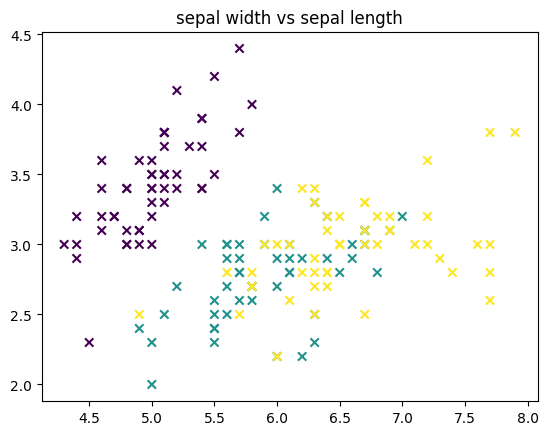

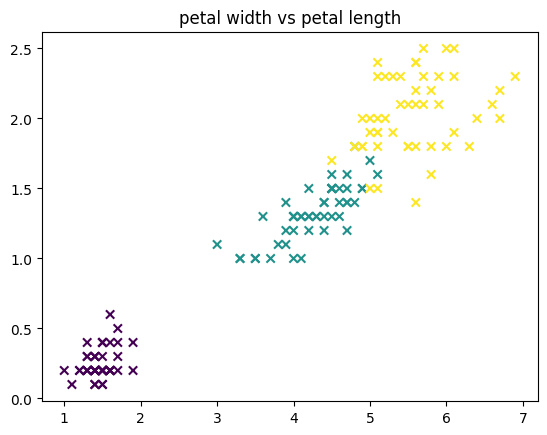

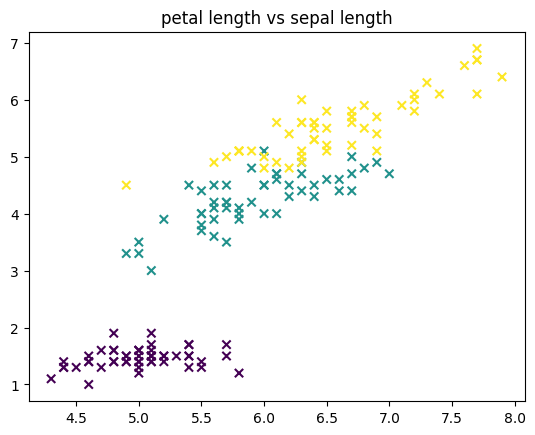

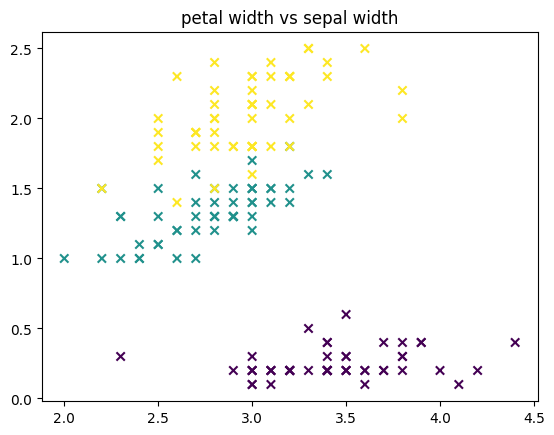

In [85]:
features = ["sepal length", "sepal width", "petal length", "petal width"]

permutations = [(0, 1), (2, 3), (0, 2), (1, 3)]

for i, j in permutations:
    plt.figure()
    plt.title(f"{features[j]} vs {features[i]}")
    plt.scatter(X[:, i], X[:, j], marker="x", c=y)
    plt.show()

We can see that one class is separable from the others, while perfectly separating the other two classes linearly is not possible. Your tasks in this notebook are now:

- Add and adapt your classification code from the binary classification exercise, so that is can predict the class label for each sample.
- Use the sklearn method [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to obtain an evaluation of the classification performance. The result should be:

<pre>
             precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000        50
          1     0.9600    0.9600    0.9600        50
          2     0.9600    0.9600    0.9600        50

avg / total     0.9733    0.9733    0.9733       150
</pre>

## Solution

Multi-Class Classification

In [86]:
#Import necessary libraries
import numpy as np
from sklearn.metrics import classification_report


#Add a bias term (column of ones) to X
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

In [87]:
#Number of classes and features
n_classes = len(np.unique(y))
n_features = X_bias.shape[1]

#Implement One-vs-All Classification
weights = np.zeros((n_classes, n_features))  #to store weights for each class

In [104]:
for class_label in range(n_classes):
    #Create binary labels for the current class (1 for the class, 0 for others)
    y_binary = (y == class_label).astype(int)
    
    #Calculate weights using the Normal Equation
    weights[class_label] = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y_binary

In [105]:
#Calculate scores for each class and choose the class with the highest score
scores = X_bias @ weights.T
y_pred = np.argmax(scores, axis=1)

In [90]:
#Evaluate the Performance using classification_report
print("Classification Report:")
print(classification_report(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.83      0.68      0.75        50
           2       0.73      0.86      0.79        50

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



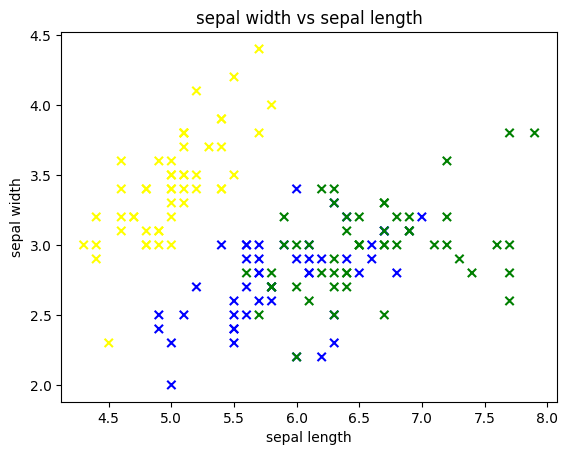

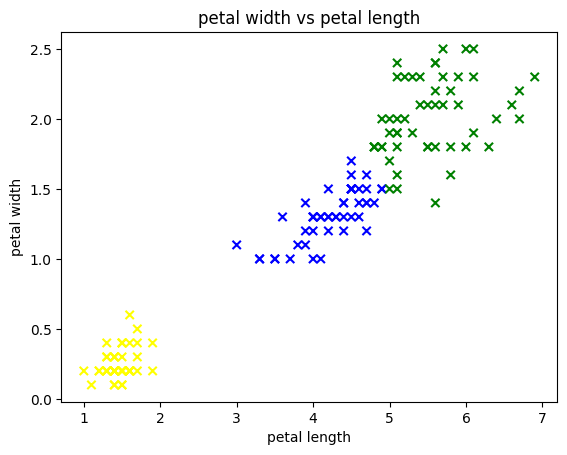

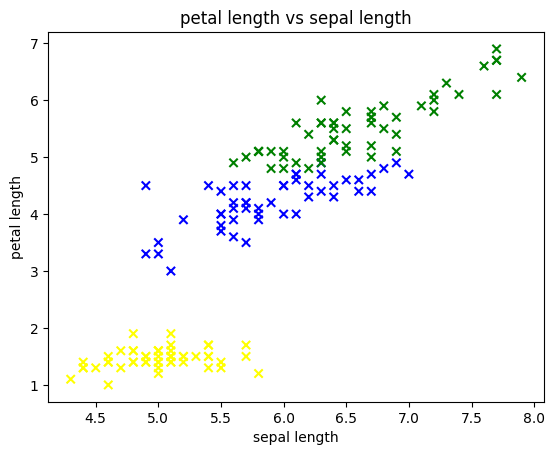

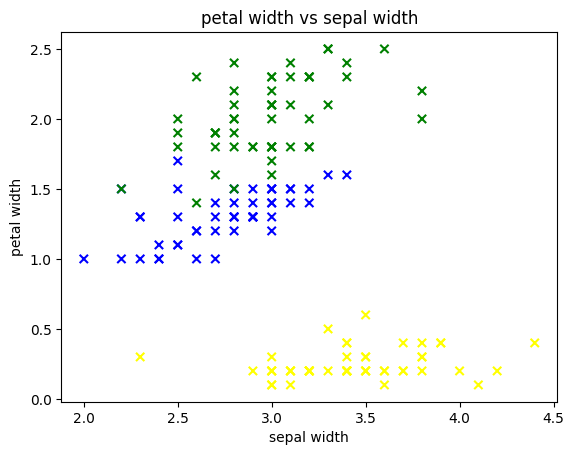

In [103]:
#Import necessary library
from matplotlib.colors import ListedColormap
# Visualize the classification for selected feature pairs
features = ["sepal length", "sepal width", "petal length", "petal width"]
permutations = [(0, 1), (2, 3), (0, 2), (1, 3)]

# Custom colormap for classes
custom_cmap = ListedColormap(['yellow', 'blue', 'green'])

for i, j in permutations:
    plt.figure()
    plt.title(f"{features[j]} vs {features[i]}")
    plt.scatter(X[:, i], X[:, j], c=y_pred, cmap=custom_cmap, marker="x")
    plt.xlabel(features[i])
    plt.ylabel(features[j])
    plt.show()

Using Logistic Regression for classification:

In [95]:
#Import necessary libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [100]:
#Create and train the logistic regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X, y)

LogisticRegression(max_iter=200)

In [101]:
#Make predictions
y_pred = log_reg.predict(X)

In [102]:
#Evaluate the classification performance
print("Classification Report:")
print(classification_report(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



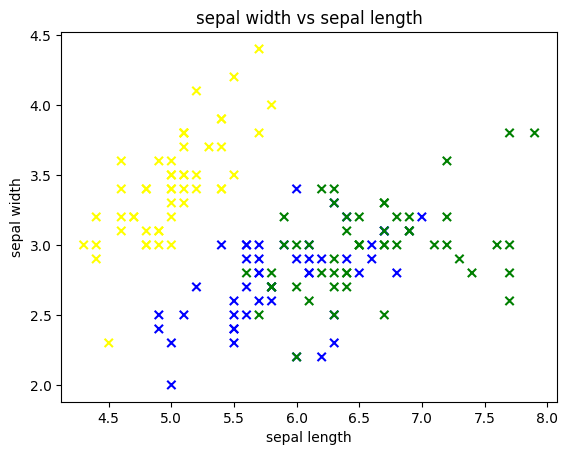

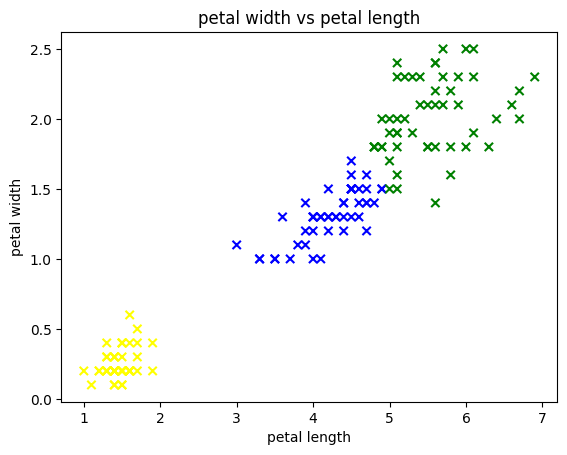

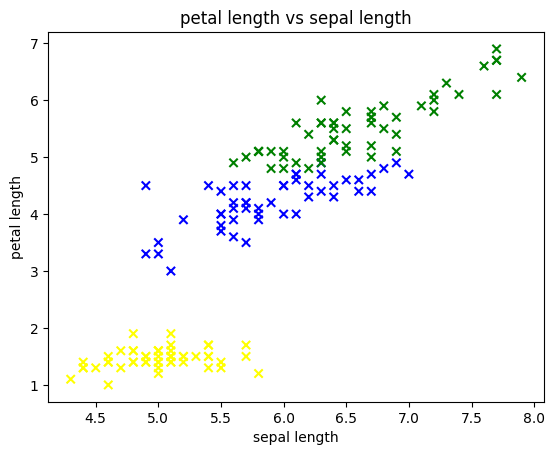

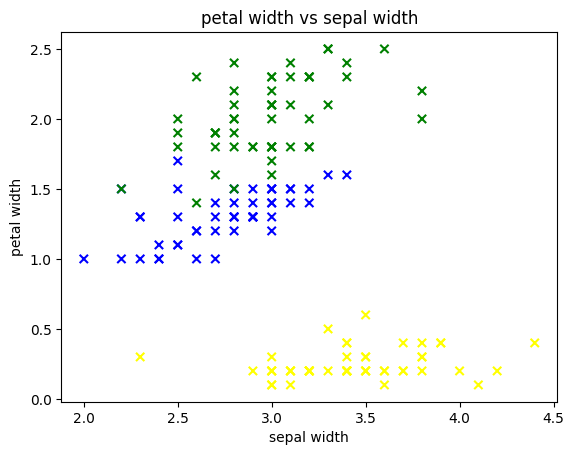

In [99]:
#Import necessary library
from matplotlib.colors import ListedColormap
# Visualize the classification for selected feature pairs
features = ["sepal length", "sepal width", "petal length", "petal width"]
permutations = [(0, 1), (2, 3), (0, 2), (1, 3)]

#Custom colormap for classes
custom_cmap = ListedColormap(['yellow', 'blue', 'green'])

#Plot the feature pairs
for i, j in permutations:
    plt.figure()
    plt.title(f"{features[j]} vs {features[i]}")
    plt.scatter(X[:, i], X[:, j], c=y_pred, cmap=custom_cmap, marker="x")
    plt.xlabel(features[i])
    plt.ylabel(features[j])
    plt.show()